<a href="https://colab.research.google.com/github/Frostbite22/cifar-10/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
import torchvision

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor

##datasets
train_data = datasets.CIFAR10(root='data',
                             train=True,
                             transform=ToTensor(),
                             target_transform=None,
                             download=True)

test_data = datasets.CIFAR10(root='data',
                             train=False,
                             transform=ToTensor(),
                             target_transform=None,
                             download=True
                             )

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [ ]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
image, target = train_data[0]

In [ ]:
image.shape # color channel - width - height 

torch.Size([3, 32, 32])

In [ ]:
target

6

In [ ]:
train_data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
train_data.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [ ]:
class_names = train_data.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Text(0.5, 1.0, 'frog')

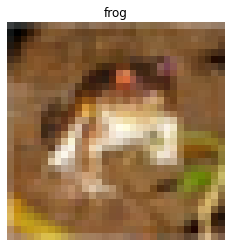

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(image.permute(1,2,0))
plt.axis(False)
plt.title(class_names[target])

In [ ]:
## FROM datasets to DataLoaders
from torch.utils.data import DataLoader 
import os

NUM_WORKERS = os.cpu_count()
BATCH_SIZE=64 

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=NUM_WORKERS)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             num_workers=NUM_WORKERS)

In [ ]:
train_features_batch, train_labels_batch  = next(iter(train_dataloader))

In [ ]:
train_features_batch.shape, train_labels_batch.shape

(torch.Size([64, 3, 32, 32]), torch.Size([64]))

In [ ]:
import torch.nn as nn

class ResNet18(nn.Module):
    def __init__(self, input_shape : int,
                hidden_units : int,
                output_shape : int):
        super(ResNet18,self).__init__()

        self.conv1 = nn.Conv2d(input_shape, hidden_units, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(hidden_units)
        self.layer1 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1,),
            nn.BatchNorm2d(hidden_units),        
            nn.ReLU()
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units*2, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(hidden_units*2),
            nn.ReLU(),
            nn.Conv2d(hidden_units*2, hidden_units*2, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(hidden_units*2),
            nn.ReLU()
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(hidden_units*2, hidden_units*4, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(hidden_units*4),
            nn.ReLU(),
            nn.Conv2d(hidden_units*4, hidden_units*4, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(hidden_units*4),
            nn.ReLU()
        )
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(hidden_units*4, output_shape)
        self.dropout = nn.Dropout()

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.layer1(x) 
        x = self.layer2(x) 
        x = self.dropout(x)
        x = self.layer3(x) 
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


In [ ]:
torch.manual_seed(42)
model_1 = ResNet18(input_shape=3,
                hidden_units=16,
                output_shape=len(class_names)).to(device)

model_1

ResNet18(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, k

In [ ]:
model_1(train_features_batch.to(device))

tensor([[-2.0163e-01, -2.2079e-01, -6.7520e-02, -4.1391e-01,  3.3101e-01,
         -3.1189e-01,  1.3120e-01, -5.0141e-02,  6.4887e-02, -6.6448e-03],
        [-1.6256e-01, -5.7643e-02, -9.9241e-02, -3.5894e-01,  2.5961e-01,
         -2.7096e-01,  2.2253e-01,  1.8098e-02,  9.4026e-03, -5.9751e-02],
        [-2.3777e-01, -1.5253e-01, -1.1960e-01, -3.4749e-01,  2.5868e-01,
         -2.3840e-01,  2.1353e-01,  5.7341e-02,  8.9275e-02,  2.2657e-02],
        [-3.6350e-01, -3.1065e-01,  6.1622e-03, -4.2324e-01,  4.3631e-01,
         -2.6926e-01,  3.0935e-01, -9.5368e-02,  9.2652e-02,  9.0214e-02],
        [-5.1625e-01, -3.4908e-01,  3.5866e-02, -4.5021e-01,  4.3485e-01,
         -1.9960e-01,  4.2971e-01, -1.3027e-02,  1.6659e-01, -3.3246e-02],
        [-4.7545e-01, -2.6688e-01,  2.5642e-02, -3.8026e-01,  3.4248e-01,
         -1.1947e-01,  2.6343e-01, -9.9267e-03,  1.7409e-01,  7.8667e-02],
        [-2.3791e-01, -4.1080e-02, -1.1610e-01, -4.5374e-01,  2.9463e-01,
         -3.7774e-01,  4.5161e-0

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

summary(model_1,input_size=(BATCH_SIZE,3,32,32))

In [ ]:
# Create train and test loops functions 
def train_step(model: torch.nn.Module,
               dataloader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
  #put the model in train mode 
  model.train()
  #setup train loss and train accuracy values 
  train_loss, train_acc = 0,0 
  #Loop through data loader data batchtes 
  for batch, (X,y) in enumerate(dataloader):
    #send data to the target device 
    X,y = X.to(device), y.to(device)
    #1.forward pass
    y_pred = model(X) #output model logits
    #2.Calculate the loss
    loss = loss_fn(y_pred,y)
    train_loss += loss.item()
    #3.Optimizer zero grad 
    optimizer.zero_grad()
    #4.loss backward
    loss.backward()
    #5. Optimizer step
    optimizer.step()

    #calculate accuracy metric 
    y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)
  
  #Adjust metrics to get average loss and accuracy per batch 
  train_loss = train_loss /len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc 


In [ ]:
#Create a test step function 
def test_step(model: torch.nn.Module,
              dataloader : torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              device=device):
  #put model in eval model 
  model.eval()
  #setup test loss and test accuracy values 
  test_loss, test_acc = 0,0
  #Turn on inference model 
  with torch.inference_mode():
    #Loop through Dataloader batches 
    for batch, (X,y) in enumerate(dataloader):
      X,y = X.to(device), y.to(device)
      #1.forward pass
      test_pred_logits = model(X)
      #2.Calculate the loss 
      loss = loss_fn(test_pred_logits,y)
      test_loss += loss.item()
      #calculate the accuracy 
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += (test_pred_labels==y).sum().item() / len(test_pred_labels)

  #Adujust metrics to get average loss and accuracy per batch 
  test_loss = test_loss / len(dataloader) 
  test_acc = test_acc / len(dataloader) 
  return test_loss , test_acc  

In [ ]:
from tqdm.auto import tqdm

def train(model : torch.nn.Module,
          train_dataloader : torch.utils.data.DataLoader,
          test_dataloader : torch.utils.data.DataLoader, 
          loss_fn : torch.nn.Module,
          optimizer : torch.optim.Optimizer,
          epochs : int = 5, 
          device = device):
  #create empty results dict 
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  #loop through training and testing steps for a number of epochs 
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader= train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader= test_dataloader,
                                    loss_fn=loss_fn,
                                    optimizer= optimizer, 
                                    device=device) 

    #print out 
    print(f'Epoch : {epoch} | train loss: {train_loss: .4f} | Train acc : {train_acc : .4f} | Test loss : {test_loss : .4f} | Test acc : {test_acc :.4f} ')

    #Update results dictionary 
    results['train_loss'].append(train_loss)
    results['train_acc'].append(train_acc)
    results['test_loss'].append(test_loss) 
    results['test_acc'].append(test_acc)
  
  #Return the filled results at the end of the epochs 
  return results

  

In [ ]:
#Train and evaluate model 1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set number of epochs 
NUM_EPOCHS = 30

#Recreate an instance of tinyVGG
model_1  = ResNet18(input_shape=3,
                   hidden_units=24,
                   output_shape=len(train_data.classes)).to(device)

#Setup loss funcion and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

# Start the timer 
from timeit import default_timer as timer 
start_time = timer()

#Train model 1 
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        loss_fn=loss_fn,
                        optimizer=optimizer,
                        epochs=NUM_EPOCHS)

#End the timer and print out how long it took 
end_time = timer()
print(f'Total training time : {end_time - start_time:.3f} seconds')

In [ ]:
from pathlib import Path 

#Create model directory 
MODEL_PATH = Path('model')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = 'resnet18.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


In [ ]:
#Saving the model

torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

In [ ]:
#Load the model 
loaded_model_1 = ResNet18(input_shape=3,
                        hidden_units=24,
                        output_shape=len(class_names))


In [ ]:
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_1

In [ ]:
#Send the model to target device 
model_1.to(device)

In [ ]:
image, label = test_data[20]

In [ ]:
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False)

In [ ]:
logits = model_1(image.to(device).unsqueeze(0))
logits

In [ ]:
pred_prob = torch.softmax(logits,dim=1)
pred_prob

In [ ]:
pred = torch.argmax(pred_prob,dim=1)
pred

In [ ]:
class_names[pred]

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  preds = []
  for image in data:
    logits = model(image.to(device).unsqueeze(0))
    pred_prob = torch.softmax(logits,dim=1)
    pred = torch.argmax(pred_prob,dim=1)
    preds.append(pred)

  return preds


In [ ]:
import random 

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

In [ ]:
preds = make_predictions(model=model_1,
                             data=test_samples)
preds

In [ ]:
#Plot predictions 
plt.figure(figsize=(9,9))
nrows = 3 
ncols = 3 
for i, sample in enumerate(test_samples):
  #create subplot 
  plt.subplot(nrows,ncols,i+1)
  #plot target image 
  plt.imshow(sample.permute(1,2,0))
  #find the prediction label in text form
  pred_label = class_names[preds[i]]
  # Get the truth label in text form 
  truth_label = class_names[test_labels[i]]
  #Create a title for the plot 
  title_text = f"Pred : {pred_label} | Truth: {truth_label}"
  #Check for equality between pred and truth and color of title text
  if pred_label == truth_label: 
    plt.title(title_text,fontsize=10,c="g")
  else: 
    plt.title(title_text,fontsize=10,c="r")
  plt.axis(False)